In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import copy

## Various Portfolio Models


### 1. **Maximize expected return (disregard risk)**: 

* Maximize:  $W^T\ \dot\ E$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$


### 2. **Minimize risk (disregard expected return)**: 

* Minimize:  $W^T\ \dot\ Cov\ @ W\ =\ \sigma^2$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$


### 3. **Minimize risk for a given level of expected return p***: 

* Minimize:  $W^T\ \dot\ Cov\ \dot\ W\ =\ \sigma^2$

* Subject to:
    * $W^T\ \dot\ E\ =\ p^*$
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$



### 4. **Maximize return for a given level of risk** $\sigma^{2^*}$: 

* Maximize:  $W^T\ \dot\ E$

* Subject to:
    * $W^T\ \dot\ Cov\ \dot\ W\ =\ \sigma^2$
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$


### 5. **Maximize return and Minimize risk**: 

* Maximize:  $W^T\ \dot\ E$
* Minimize:  $W^T\ \dot\ Cov\ \dot\ W$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$

#### For simplicity first try to do **Model 1**

## Portfolio Model 1:

$$
    Return = \sum_{i=0}^{n} W_i * E_i = W\ @\ E
$$

where, 

$W_{i}$ = Weights of $i^{th}$ asset.

$E_{i}$ = Expected return of asset $i$


## Objective Function

* **Maximize** 
    
    $W.T\ @\ E$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$

## Portfolio Model 5:

$$
    Return = \sum_{i=0}^{n} W_i * E_i = W\ @\ E
$$

where, 

$W_{i}$ = Weights of $i^{th}$ asset.

$E_{i}$ = Expected return of asset $i$


## Objective Function

* **Maximize** 
    
    $W.T\ @\ E$

* **Minimize**

    $W @\ Cov\ @\ W^T$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$

This is a **multi-objective** task.

We can change the objective function to-

* **Minimize**

    $-(W.T\ @\ E) + \mu (W\ @\ Cov\ @\ W^T)$

* Subject to:
    * $\forall_i w_i \geq 0$
    * $\sum_{i=0}^{D-1} w_i = 1$

i.e. **maximize return $\equiv$ minimize negative return**

where, $\mu \gt 0$ = how much an investor weights risk over expected
return = risk-aversion index that determines risk tolerance of an investor.

* A smaller value of $\mu$ indicates that the investor is more risk-seeking
* A larger value of $\mu$ indicates that the investor is more risk-averse.


If $\mu = 0$, then it will become Model 1 objective i.e. only minimize return disregard risk.

If $\mu = \infty$, then it will become Model 2 objective i.e. only minimize risk disregard return

## Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Stock Dataset/Daily_Return%.csv')

In [3]:
df

,AAPL,Date,SBUX,MSFT,CSCO,QCOM,AMZN,TSLA,AMD
0,0.000000,06/22/2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.384189,06/21/2022,-0.463847,0.240983,1.308240,1.825475,-0.247820,0.402395,0.047761
2,-3.172150,06/17/2022,-1.493969,-2.400095,-1.699139,-2.733339,-2.263526,-8.554232,-2.649481
3,-1.140164,06/16/2022,-1.280089,-1.082172,-0.161327,-0.140507,-2.410092,-1.688503,0.588452
4,4.128864,06/15/2022,4.566596,2.771768,1.108033,8.450588,3.868416,9.338339,8.836076
...,...,...,...,...,...,...,...,...,...
247,-0.459988,06/29/2021,0.411412,0.184570,-0.169811,-0.216889,0.231966,0.155951,-4.694986
248,-1.136947,06/28/2021,-0.026721,-0.987472,0.094500,-2.033375,-0.123255,1.169281,-2.725648
249,-1.239056,06/25/2021,0.712758,-1.376898,0.188822,-1.481534,-1.232037,-2.446568,-1.676619
250,0.225378,06/24/2021,-0.928875,0.630141,-0.527704,0.196150,1.399987,1.183265,0.560617


In [4]:
df.drop('Date', inplace=True, axis=1)

In [5]:
avg_daily_return = np.array([df[column].mean() for column in df.columns])

In [6]:
avg_daily_return

array([0.01240898, 0.18675523, 0.03438141, 0.09097775, 0.07647848,
       0.22212376, 0.04478286, 0.06377839])

In [7]:
expected_daily_return = avg_daily_return * len(df)

In [8]:
expected_daily_return

array([ 3.12706363, 47.06231689,  8.66411486, 22.92639186, 19.27257782,
       55.97518825, 11.28528022, 16.07215498])

In [9]:
expected_daily_return = expected_daily_return.reshape(-1, 1)

In [10]:
expected_daily_return

array([[ 3.12706363],
       [47.06231689],
       [ 8.66411486],
       [22.92639186],
       [19.27257782],
       [55.97518825],
       [11.28528022],
       [16.07215498]])

In [143]:
assets_covariance = df.cov()

In [144]:
assets_covariance

,AAPL,SBUX,MSFT,CSCO,QCOM,AMZN,TSLA,AMD
AAPL,3.479171,2.241229,2.595523,1.713686,3.303725,3.152236,4.353335,4.164809
SBUX,2.241229,4.002191,1.982140,1.444923,2.930417,2.709174,3.435902,3.613847
MSFT,2.595523,1.982140,3.181980,1.511088,3.137145,3.109144,3.850354,4.151222
CSCO,1.713686,1.444923,1.511088,3.112182,1.800175,1.593107,1.743919,2.301795
QCOM,3.303725,2.930417,3.137145,1.800175,7.075897,4.296707,5.372776,7.000591
AMZN,3.152236,2.709174,3.109144,1.593107,4.296707,6.822370,4.904870,5.228250
TSLA,4.353335,3.435902,3.850354,1.743919,5.372776,4.904870,15.182518,8.402622
AMD,4.164809,3.613847,4.151222,2.301795,7.000591,5.228250,8.402622,12.777921


In [145]:
assets_covariance.shape

(8, 8)

## Differential Evolution Algorithm - Approach 1

1. $x_{i, G} = 0, 1, 2,.., NP-1$
2. A trial vector $\bar v$ is created from $x$ using the formula-

    $\bar v = x_{r_1, G} + F * (x_{r_2, G} − x_{r_3, G} )$

    where, $r_1, r_2, r_3 \in [0, NP-1]$ integer and mutually different $F \gt 0$

    The integers $r_1$, $r_2$ and $r_3$ are chosen randomly from the interval $[0, NP-1]$ and are different from the running index $i$. $F$ is a real and constant factor which controls the amplification of the differential variation $(x_{r_2, G} - x_{r_3, G})$

3. In order to increase the diversity of the parameter vectors, the vector $\bar u$ is created-

    $\bar u = (u_0, u_1,.., u_{D-1})^T$

    with, 

$$
    \bar u_j= \begin{cases}
    \bar v_j, & {j = \langle n\rangle_D, \langle n+1\rangle_D,..,\langle n+L-1\rangle_D} \\
    (x_{i, G})_j, & {for\ all\ other\ j \in [0, D-1]}.
    \end{cases}
$$

Symbols used-

* $x$ = weights vector
* $NP$ = No. of population
* $F$ = mutation rate
* $D$ = Dimension
* $n$ = starting index
* $L$ = No. of parameters that going to be exchanged

4. $L$ is find by using pseudo algorithm-

```
L = 0;
do {
    L = L + 1;
} while(rand()< CR) AND (L < D));
```
where,  

probability $Pr(L \geq ν) = (CR)^{ν-1}, ν > 0.$ 

$CR \in [0,1]$ = crossover probability

5. In order to decide whether the new vector $\bar u$ shall become a population member of generation $G+1$, it will be compared to $x_{i, G}$ . If vector $\bar u$ yields a smaller objective function value than $x_{i, G},\ x_{i, G+1}$ is set to $\bar u$, otherwise the old value $x_{i, G}$ is retained. 

Differential Evolution works for **minimization problem**. So we need to convert the maximization problem to minimization.

Maximize: $W * E$

converted to

Minimize: $-(W * E)$

## Differential Evolution Algorithm - Approach 2

Same way as **Approach 1** but the vector $\bar v$ is different-

$$
    \bar v = x_{i, G} + \lambda * (x_{best, G} - x_{i, G}) + F * (x_{r_2, G} − x_{r_3, G})
$$

where, 

$\lambda$ = enhance the greediness of appraoch

$x_{best, G}$ = current best vector

$x_{i, G}$ = current vector

## Portfolio Algorithm based on Differential Evolution


1. Draw a random population of $n$ candidates. This is the old population.

2. While iter < itermax

    * Evaluate each member’s fitness. Find the best member.

3. Generate an intermediate population of $n$ candidates:
```
iter = 1
for i = 1 to NP
    for each candidate i, randomly choose 2 different members from the
    population. Substract one from the other and add F times the difference to candidate i.
    
    for j = 1 to D
        randomly choose ωj from either the best member (with probability
        CR) or the modified version of candidate i (with probability 1 − CR).
        This is intermediate candidate i
```
4. 
```
for i = 1 to n
    compare candidate i to intermediate candidate i. The fittest member
    goes into the next generation and we now have the new population.
```
5. iter = iter + 1

    * Go to step 2.

In [148]:
D = 8
NP = 2000
F = 0.1 # F > 0 (0, 2)
CR = 0.5 # [0, 1]
lmbd = 0.1 # [0, 1]
mu = 1 # mu > 0

In [149]:
X = np.random.dirichlet(np.ones(D), size=NP)

In [150]:
X

array([[0.04367294, 0.1784974 , 0.08714791, ..., 0.03676933, 0.24921558,
        0.03620438],
       [0.02723336, 0.10981311, 0.04217308, ..., 0.14302018, 0.27570523,
        0.01104856],
       [0.38161082, 0.13084867, 0.04198554, ..., 0.0118985 , 0.07719833,
        0.01838607],
       ...,
       [0.31675885, 0.0672265 , 0.07764181, ..., 0.17532112, 0.02584019,
        0.05692557],
       [0.17372804, 0.10752905, 0.04320663, ..., 0.30944348, 0.07085355,
        0.08592314],
       [0.05418822, 0.19579316, 0.04175372, ..., 0.04189995, 0.53037038,
        0.04750283]])

In [151]:
X.shape

(2000, 8)

In [152]:
# Model 1 fitness function
def fitness_M1(W, E):
    portfolio_return = -(W @ E)
    return portfolio_return 

In [155]:
# Model 1 fitness function
def fitness_M5(W, E, ACov):
    if W.shape[0] == NP:
        risk = np.array(W @ ACov @ W.T).diagonal().reshape(NP, 1)
    else:
        risk = W @ ACov @ W.T
    portfolio_return = -(W @ E) + (mu * risk)
    return portfolio_return 

In [156]:
def trial_vector(X):
    r1, r2 = np.random.choice([i for i in range(NP)], size=2, replace=False)

    v = np.absolute((X[r1] - X[r2]) + (F * (X[r1] - X[r2])))
    
    return v

In [157]:
def modifiedV_U(v, bm):
    for j in range(D):
        n = np.random.choice(['BM', 'MC'], size=1, replace=False, p=[CR, 1-CR])
        if n == 'BM':
            v[j] = bm[j]

    return v

In [162]:
def compareXU_M1(u, x, E):
    result_u = fitness_M1(u, E)
    result_x = fitness_M1(x, E)

    member = u if result_u < result_x else x

    return member

In [165]:
def compareXU_M5(u, x, E, ACov):
    result_u = fitness_M5(u, E, ACov)
    result_x = fitness_M5(x, E, ACov)

    member = u if result_u < result_x else x

    return member

In [159]:
def normalizeMember(member):
    normalized_member = member/np.sum(member)

    return normalized_member


In [166]:
X_copy = copy.deepcopy(X)
E = copy.deepcopy(expected_daily_return)
F_copy = copy.deepcopy(F)
CR_copy = copy.deepcopy(CR)
lmbd_copy = copy.deepcopy(lmbd)
ACov = copy.deepcopy(assets_covariance)

In [167]:
n_epochs = 500

min_idx = []
min_fitness_score = []
min_x_val = []
min_fitness_score_so_far = [0]
sum_vector = []

for epoch in range(n_epochs):
    print(f"Generation: {epoch}")
    print(X_copy)
    print(np.array(np.sum(X_copy, axis=1)))
    print('\n')

    sum_vector.append(np.sum(X_copy, axis=1))

    # fitness_score = fitness_M1(X_copy, E)
    fitness_score = fitness_M5(X_copy, E, ACov)
    fitness_score = fitness_score.flatten()
    min_fs = np.min(fitness_score)
    min_fs_idx = list(fitness_score).index(min_fs)
    min_x = list(X_copy[min_fs_idx])

    min_idx.append(min_fs_idx)
    min_fitness_score.append(min_fs)
    min_x_val.append(min_x)
    if min_fs < min_fitness_score_so_far[-1]:
        min_fitness_score_so_far.append(min_fs)

    best_member = X_copy[min_fs_idx]
    
    # F_copy = 1 - (epoch / (epoch + n_epochs))
    # CR_copy = np.exp((epoch - n_epochs) / n_epochs)

    new_population = []
    for i in range(NP):
        
        v = trial_vector(X_copy)

        u = modifiedV_U(v, best_member)

        # member = compareXU_M1(u, X_copy[i], expected_daily_return)
        member = compareXU_M5(u, X_copy[i], expected_daily_return, ACov)

        # To bring values between [0, 1]
        normalized_member = normalizeMember(member)

        new_population.append(normalized_member)

    new_population = np.array(new_population)
    # print(new_population)

    X_copy = new_population


Streaming output truncated to the last 5000 lines.


Generation: 206
[[2.74070612e-20 7.03971896e-16 6.14801303e-22 ... 1.00000000e+00
  1.56956517e-20 4.35759733e-21]
 [7.54256149e-19 7.03971896e-16 6.14801303e-22 ... 1.00000000e+00
  6.37240034e-21 1.38964522e-20]
 [2.74070612e-20 7.03971896e-16 1.30850644e-20 ... 1.00000000e+00
  1.56648051e-20 1.34900273e-20]
 ...
 [8.16496872e-20 0.00000000e+00 5.52017155e-21 ... 1.00000000e+00
  1.42738111e-20 1.26452224e-20]
 [7.22520886e-19 5.74310073e-16 5.58910275e-21 ... 1.00000000e+00
  4.57898853e-23 9.65632512e-22]
 [8.85230860e-19 1.13286865e-17 6.14801303e-22 ... 1.00000000e+00
  1.46186247e-20 1.36860240e-20]]
[1. 1. 1. ... 1. 1. 1.]


Generation: 207
[[2.74070612e-20 7.03971896e-16 6.14801303e-22 ... 1.00000000e+00
  1.56956517e-20 4.35759733e-21]
 [7.54256149e-19 7.03971896e-16 6.14801303e-22 ... 1.00000000e+00
  6.37240034e-21 1.38964522e-20]
 [2.74070612e-20 7.03971896e-16 1.30850644e-20 ... 1.00000000e+00
  1.56648051e-20 1.349002

In [168]:
min_idx

[125,
 101,
 184,
 1997,
 1673,
 1264,
 1583,
 1492,
 1893,
 506,
 1573,
 1201,
 305,
 350,
 1706,
 229,
 265,
 170,
 812,
 1133,
 90,
 1670,
 1256,
 1803,
 241,
 1294,
 32,
 32,
 32,
 4,
 5,
 27,
 1,
 2,
 2,
 2,
 1945,
 15,
 15,
 7,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 4,
 4,
 4,
 4,
 0,
 11,
 11,
 5,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 4,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 14,
 14,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 21,
 21,
 23,
 23,
 24,
 17,
 17,
 4,
 16,
 17,
 16,
 14,
 8,
 8,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 5,
 2,
 5,
 6,
 6,
 5,
 5,
 6,
 19,
 19,
 10,
 10,
 10,
 10,
 10,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,

In [169]:
min_x_val

[[0.0011825074629112232,
  0.22405915118254546,
  0.02182573732512776,
  0.05254322219072668,
  0.11227352021716905,
  0.5408836636762105,
  0.0014011458961406362,
  0.045831052049168625],
 [0.00137124298246333,
  0.25982038029541116,
  0.025309260265037572,
  0.06092944608371964,
  0.016101623337206196,
  0.6272120484712251,
  0.0016247774646259326,
  0.007631221100311123],
 [1.2293742776185396e-05,
  0.24111541562202687,
  0.00022690765935220891,
  0.0005462568977403859,
  0.001167233037776047,
  0.7459240183349728,
  0.0019322979178539909,
  0.009075576787501483],
 [1.5358842260923272e-05,
  0.060152804821812386,
  0.0002834807113857034,
  0.00068245071326758,
  0.0014582498133658892,
  0.9318992226219096,
  0.0024140621340247867,
  0.003094370341973241],
 [1.2194614061628619e-06,
  0.023917121834658533,
  0.00029624642313087106,
  0.0007131828538893259,
  0.00011578212327033812,
  0.9738645358645132,
  0.00019167171291369306,
  0.0009002397262178311],
 [1.2494269062155346e-06,
  0.

In [170]:
min_fitness_score

[-40.78342215468279,
 -45.04858831791179,
 -48.18447798343422,
 -48.80319272896515,
 -49.060430794156545,
 -49.09077911372257,
 -49.13124805535995,
 -49.14160593936926,
 -49.14915843761922,
 -49.151055759479995,
 -49.152181702384816,
 -49.152484560198374,
 -49.15272752359256,
 -49.152774932536474,
 -49.15280276140719,
 -49.15281829167617,
 -49.152818292820676,
 -49.152818295288704,
 -49.15281829569205,
 -49.15281829577364,
 -49.152818295777394,
 -49.15281829578025,
 -49.15281829578052,
 -49.15281829578065,
 -49.15281829578066,
 -49.15281829578067,
 -49.15281829578067,
 -49.15281829578067,
 -49.15281829578067,
 -49.15281829578067,
 -49.15281829578067,
 -49.15281829578067,
 -49.15281829578067,
 -49.15281829578067,
 -49.15281829578067,
 -49.15281829578067,
 -49.152818295780676,
 -49.152818295780676,
 -49.152818295780676,
 -49.152818295780676,
 -49.152818295780676,
 -49.152818295780676,
 -49.152818295780676,
 -49.152818295780676,
 -49.152818295780676,
 -49.152818295780676,
 -49.15281829578

In [171]:
min_fitness_score_so_far

[0,
 -40.78342215468279,
 -45.04858831791179,
 -48.18447798343422,
 -48.80319272896515,
 -49.060430794156545,
 -49.09077911372257,
 -49.13124805535995,
 -49.14160593936926,
 -49.14915843761922,
 -49.151055759479995,
 -49.152181702384816,
 -49.152484560198374,
 -49.15272752359256,
 -49.152774932536474,
 -49.15280276140719,
 -49.15281829167617,
 -49.152818292820676,
 -49.152818295288704,
 -49.15281829569205,
 -49.15281829577364,
 -49.152818295777394,
 -49.15281829578025,
 -49.15281829578052,
 -49.15281829578065,
 -49.15281829578066,
 -49.15281829578067,
 -49.152818295780676]

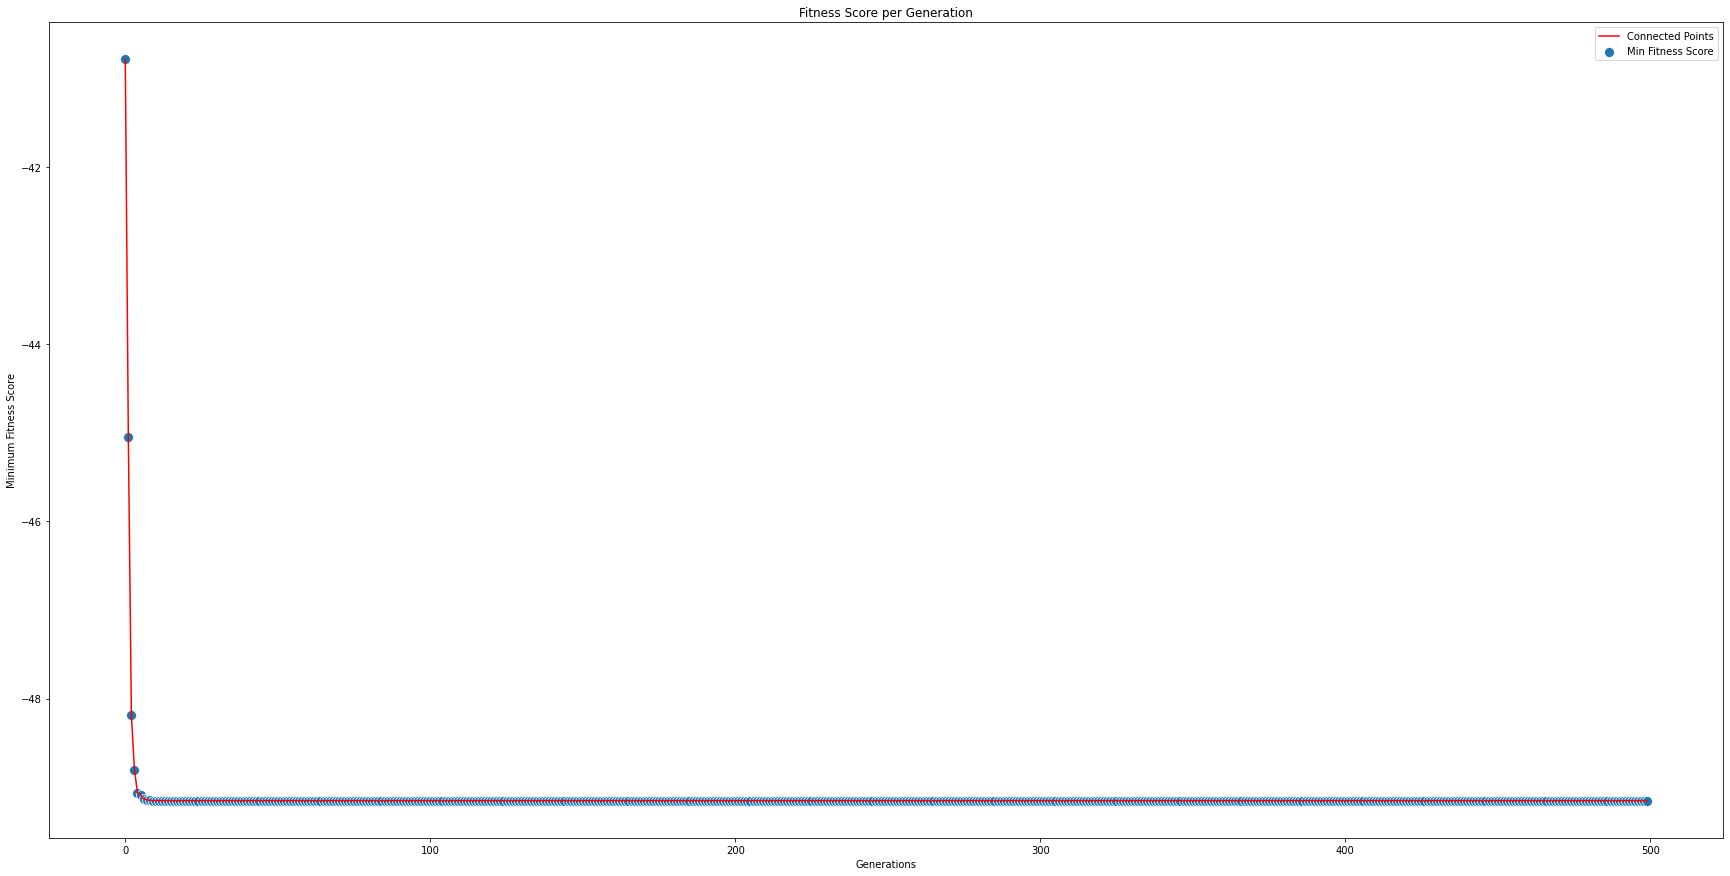

In [173]:
plt.figure(figsize=(30, 15))

sb.lineplot(x=[i for i in range(n_epochs)], y=min_fitness_score, color='r')
sb.scatterplot(x=[i for i in range(n_epochs)], y=min_fitness_score, s=100, legend='full')
plt.xlabel("Generations")
plt.ylabel("Minimum Fitness Score")
plt.title("Fitness Score per Generation")
plt.legend(["Connected Points", "Min Fitness Score"])

## References:

1. https://ethz.ch/content/dam/ethz/special-interest/mtec/chair-of-entrepreneurial-risks-dam/documents/dissertation/master%20thesis/RoudierMScThesis.pdf